In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\jared\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\jared\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\jared\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\jared\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\jared\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\j

True

## Reading File and creating DataFrame

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import pickle
import nltk

In [3]:
import pandas as pd
wiki_files = pd.read_csv('wiki_sample.csv')
wiki_dataframe = pd.DataFrame(wiki_files)
wiki_dataframe

,content,title,id
0,Morocco–Saudi Arabia relations\r\n\r\nMoroccan...,Morocco–Saudi Arabia relations,1
1,Anthony United States Post Office\r\n\r\nThe A...,Anthony United States Post Office,2
2,Dumraon (Vidhan Sabha constituency)\r\n\r\nDum...,Dumraon Vidhan Sabha constituency,3
3,Chaker Khazaal\r\n\r\nChaker Khazaal (born 28 ...,Chaker Khazaal,4
4,Vicente Pascual Pastor\r\n\r\nVicente Pascual ...,Vicente Pascual Pastor,5
...,...,...,...
1286259,Toppr\r\n\r\nToppr is a product of Haygot Educ...,Toppr,1286260
1286260,Outline of education\r\n\r\nThe following outl...,Outline of education,1286261
1286261,Raell Padamsee\r\n\r\nRaell Padamsee is an Ind...,Raell Padamsee,1286262
1286262,Megan Callaway\r\n\r\nMegan Callaway is a foun...,Megan Callaway,1286263


## Preprocessing and Creating Vocab

In [4]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import pycountry
lemmatizer = WordNetLemmatizer()
from names_dataset import NameDatasetV1 # v1
names = NameDatasetV1()

stop_words = set(stopwords.words('english'))
# for domain_stop_word in domain_stop_words:
#     stop_words.add(domain_stop_word)

In [6]:
import pandas as pd
companies_file = pd.read_csv('companies_sorted.csv')
companies_dataframe = pd.DataFrame(companies_file)
companies_dataframe

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369
2,21074,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture,190689,455768
3,2309813,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army,162163,445958
4,1558607,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung,158363,428960
...,...,...,...,...,...,...,...,...,...,...,...
7173421,1494427,certiport vouchers,certiportvouchers.com,2011.0,information technology and services,1 - 10,NaN,NaN,linkedin.com/company/certiport-vouchers,0,1
7173422,1494429,black tiger fight club,blacktigerclub.com,2006.0,"health, wellness and fitness",1 - 10,"peking, beijing, china",china,linkedin.com/company/black-tiger-club-hero,0,6
7173423,4768462,catholic bishop of chicago,NaN,NaN,religious institutions,1 - 10,"inverness, illinois, united states",united states,linkedin.com/company/catholic-bishop-of-chicago,0,1
7173424,1494436,medexo robotics ltd,NaN,NaN,research,1 - 10,"london, london, united kingdom",united kingdom,linkedin.com/company/medexo-robotics-ltd,0,2


In [19]:
companies = set(companies_dataframe['name'])

In [9]:
stop_words = set(stopwords.words('english'))

In [22]:
words = set(nltk.corpus.words.words())
lowerCasedWords = map(lambda word: word.lower(), nltk.corpus.words.words())
lowerCasedWords = set(list(lowerCasedWords))
for country in list(pycountry.countries):
    lowerCasedWords.add(country.name.lower())
for company in companies:
    lowerCasedWords.add(str(company).lower())

In [11]:
# lemmatization, lowercase, remove non alphanumeric, remove non-english, remove numbers and stopword removal
rejected_content = []
def apply_function(row, lenTitle):
    filtered_content = []
    for token in nltk.word_tokenize(row['content'][lenTitle:]):
        token = lemmatizer.lemmatize(token).lower()
        if names.search_first_name(token) or names.search_last_name(token) or ((token in lowerCasedWords) and (token not in stop_words) and (token.isalpha())):
            filtered_content.append(token) 
        else:
            rejected_content.append(token)
        
    return filtered_content

In [23]:
wiki_dataframe['tokenized_content'] = wiki_dataframe.progress_apply(lambda row: apply_function(row, len(row['title'])), axis=1)

 12%|█▏        | 160695/1286264 [05:56<41:34, 451.31it/s]  


KeyboardInterrupt: 

In [ ]:
wiki_dataframe.to_pickle('./wiki_dataframe_augmented_nltk_corpus_to_remove_non-english.pkl')

In [35]:
import pickle5 as pickle
with open("./wiki_dataframe_augmented_nltk_corpus_to_remove_non-english.pkl", "rb") as pickle_file:
    wiki_dataframe = pickle.load(pickle_file)
# wiki_dataframe = pd.read_pickle('./wiki_dataframe_augmented_nltk_corpus_to_remove_non-english.pkl')

In [36]:
wiki_dataframe

,content,title,id,tokenized_content,most_frequent_term
0,Morocco–Saudi Arabia relations\r\n\r\nMoroccan...,Morocco–Saudi Arabia relations,1,"[arabian, relation, current, historical, relat...","[(morocco, 10)]"
1,Anthony United States Post Office\r\n\r\nThe A...,Anthony United States Post Office,2,"[anthony, united, post, office, listed, nation...","[(wa, 4)]"
2,Dumraon (Vidhan Sabha constituency)\r\n\r\nDum...,Dumraon Vidhan Sabha constituency,3,"[sabha, constituency, one, legislative, assemb...","[(sabha, 2)]"
3,Chaker Khazaal\r\n\r\nChaker Khazaal (born 28 ...,Chaker Khazaal,4,"[chaker, born, september, beirut, lebanon, aut...","[(refugee, 7)]"
4,Vicente Pascual Pastor\r\n\r\nVicente Pascual ...,Vicente Pascual Pastor,5,"[vicente, pascual, pastor, june, february, wa,...","[(vicente, 4)]"
...,...,...,...,...,...
1286259,Toppr\r\n\r\nToppr is a product of Haygot Educ...,Toppr,1286260,"[toppr, product, education, private, limited, ...","[(toppr, 9)]"
1286260,Outline of education\r\n\r\nThe following outl...,Outline of education,1286261,"[following, outline, provided, overview, topic...","[(education, 6)]"
1286261,Raell Padamsee\r\n\r\nRaell Padamsee is an Ind...,Raell Padamsee,1286262,"[indian, theatre, personality, ceo, managing, ...","[(theatre, 8)]"
1286262,Megan Callaway\r\n\r\nMegan Callaway is a foun...,Megan Callaway,1286263,"[megan, callaway, founder, archer, school, gir...","[(producer, 6)]"


## Creating Part of Inverted Index

In [37]:
from collections import defaultdict
from collections import Counter

inv_idx = defaultdict(list)
vocab = set()
heaps_law_dataset = list()

most_freq = []
id = 1
total_words = 0
for document in tqdm(wiki_dataframe['tokenized_content']):
    counter = Counter(document)
    most_occur = counter.most_common(1)
    most_freq.append(most_occur)
    heaps_law_dataset.append((total_words, len(vocab)))
    for word in document:
        inv_idx[word].append(id)
        total_words += 1
        vocab.add(word)
    id +=1

100%|██████████| 1286264/1286264 [01:15<00:00, 17047.63it/s]


In [38]:
wiki_dataframe['most_frequent_term'] = most_freq

In [39]:
wiki_dataframe

,content,title,id,tokenized_content,most_frequent_term
0,Morocco–Saudi Arabia relations\r\n\r\nMoroccan...,Morocco–Saudi Arabia relations,1,"[arabian, relation, current, historical, relat...","[(morocco, 10)]"
1,Anthony United States Post Office\r\n\r\nThe A...,Anthony United States Post Office,2,"[anthony, united, post, office, listed, nation...","[(wa, 4)]"
2,Dumraon (Vidhan Sabha constituency)\r\n\r\nDum...,Dumraon Vidhan Sabha constituency,3,"[sabha, constituency, one, legislative, assemb...","[(sabha, 2)]"
3,Chaker Khazaal\r\n\r\nChaker Khazaal (born 28 ...,Chaker Khazaal,4,"[chaker, born, september, beirut, lebanon, aut...","[(refugee, 7)]"
4,Vicente Pascual Pastor\r\n\r\nVicente Pascual ...,Vicente Pascual Pastor,5,"[vicente, pascual, pastor, june, february, wa,...","[(vicente, 4)]"
...,...,...,...,...,...
1286259,Toppr\r\n\r\nToppr is a product of Haygot Educ...,Toppr,1286260,"[toppr, product, education, private, limited, ...","[(toppr, 9)]"
1286260,Outline of education\r\n\r\nThe following outl...,Outline of education,1286261,"[following, outline, provided, overview, topic...","[(education, 6)]"
1286261,Raell Padamsee\r\n\r\nRaell Padamsee is an Ind...,Raell Padamsee,1286262,"[indian, theatre, personality, ceo, managing, ...","[(theatre, 8)]"
1286262,Megan Callaway\r\n\r\nMegan Callaway is a foun...,Megan Callaway,1286263,"[megan, callaway, founder, archer, school, gir...","[(producer, 6)]"


In [40]:
from collections import OrderedDict
inv_idx_ordered = OrderedDict(sorted(inv_idx.items(), key=lambda item: len(item[1]), reverse=True))

In [41]:
words = list(inv_idx_ordered.keys())
domain_stop_words = words[0:10000]

## Heaps Law

In [42]:
heaps_law_dataset[len(heaps_law_dataset)-1]

(120401795, 284750)

In [43]:
import matplotlib.pyplot as plt
import math

def heaps_law(list_to_graph):
        x = list()
        y = list()
        
        for item in list_to_graph:
            x.append(item[0])
            y.append(item[1])

        plt.plot(x, y)
        plt.xlim(1, x[-1])
        plt.ylim(1, y[-1])
        plt.savefig("heaps_law_words_from_nltk_english_corpus.png")

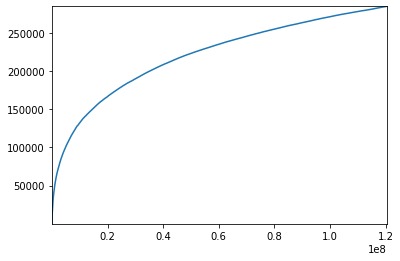

In [44]:
heaps_law(heaps_law_dataset)

## Zipfs Law

In [45]:
import matplotlib.pyplot as plt
import math

def zipfs_law(list_to_graph):
        x = list()
        y = list()
        
        for i, word in enumerate(list_to_graph):
            x.append(i+1)
            y.append(len(inv_idx_ordered[word]))
            

        plt.loglog(x, y)
        plt.savefig("zipfs_law.png")

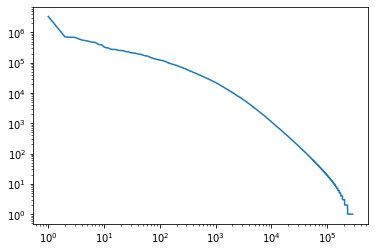

In [46]:
zipfs_law(inv_idx_ordered)

## Finishing Inverted Index

In [47]:
from collections import Counter

most_occur = counter.most_common(1)
most_freq.append(most_occur)

In [48]:
for value in tqdm(inv_idx_ordered.items()):
    inv_idx[value[0]] = (Counter(value[1]))

100%|██████████| 284750/284750 [00:34<00:00, 8339.15it/s]  


In [50]:
file_to_write = open("inv_idx_augmented_nltk_corpus_to_remove_non-english.pkl", "wb")
pickle.dump(inv_idx, file_to_write)

## TF-IDF
#### 𝑇𝐹(𝑤, 𝑑) = 𝑓𝑟𝑒𝑞(𝑤, 𝑑) / (𝑚𝑎𝑥_𝑑)
#### 𝐼𝐷𝐹(𝑤) = 𝑙𝑜𝑔__2 (𝑁 / 𝑛_𝑤)

In [81]:
len(wiki_dataframe)

1286264

In [ ]:
import math
def tf_idf(term, doc):
    return (inv_idx[term][doc] / most_freq[doc]) * math.log((len(wiki_dataframe) / len(inv_idx[term])), 2)